# Importing important libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans 

In [2]:
#loading iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####  Finding the optimum number of clusters for K Means and also determining the value of K

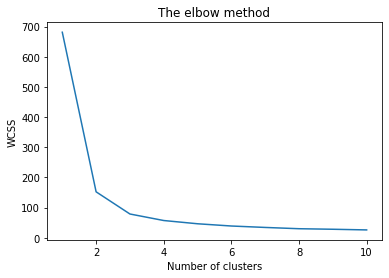

In [23]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

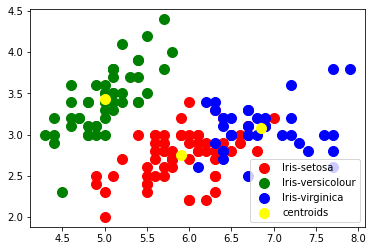

In [28]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1],
            s = 100, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1],
            s = 100, c= 'green', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1],
            s = 100, c= 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s= 100, c='yellow', label = 'centroids')
plt.legend()